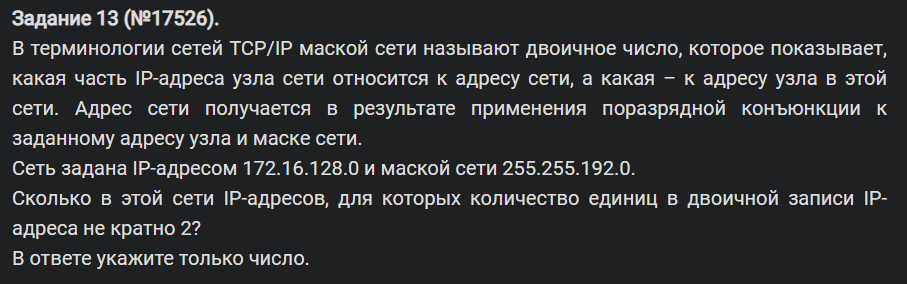

In [ ]:
from ipaddress import ip_network
net = ip_network('172.16.128.0/255.255.192.0', False)
counter = 0
for ip in net:
    baddr = f'{ip:b}'
    counter += (baddr.count('1') % 2)
print(counter)

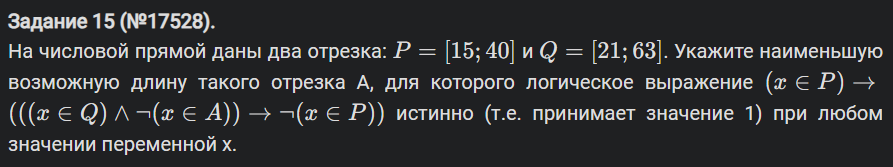

In [ ]:
# 15
def F(x,A1,A2):
    return (15 <= x <= 40) <= (((21 <= x <= 63) and not(A1 <= x <= A2)) <= (not(15 <= x <= 40)))
minn = 999999999
for A1 in range(1000):
    for A2 in range(A1 + 1,1000):
        if all(F(x,A1,A2) for x in range(1000)):
                minn = min(minn,A2 - A1)
print(minn)
# 19 +

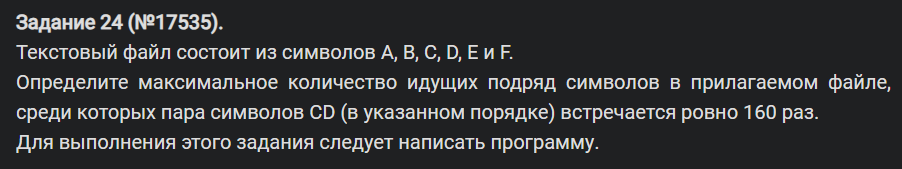

In [ ]:
# Идея: делаем два указателя и считаем расстояние между ними если CD содержится ровно 160 раз
# Пусть CD встречается ровно 3 раза
# (l)(r)AHJBSDCDJHGJJCDJHGHJGHJCDHJGJHGJHGJHCDJHHJGHJGHJGHJG
# r += 1 while count('CD') <= 3
# r -= 1 чтоб на захватывать лишний CD
# (l)AHJBSDCDJHGJJCDJHGHJGHJCDHJGJHGJHGJHC(r)DJHHJGHJGHJGHJG
# len = max(len, r - l + 1)
# l += 1 while count('CD') > 3
# l -+ 1 чтоб захватить D от предыдущего CD
# AHJBSDC(l)DJHGJJCDJHGHJGHJCDHJGJHGJHGJHCD(r)JHHJGHJGHJGHJG
# Далее в цикле повторяем пока не дойдём указателем r до конца
# AHJBSDCD(l)JHGJJCDJHGHJGHJCDHJGJHGJHGJHCDJHHJGHJGHJGHJG(r)
# len = max(len, r - l + 1)
data = open('24_17535.txt').readline()
seq_len = 0
cd_count = 0
l = 0
for r in range(1, len(data)):
    if data[r-1:r+1] == 'CD':
        cd_count += 1
    while cd_count > 160:
        if data[l:l+2] == 'CD':
            cd_count -= 1
        l += 1
    if cd_count == 160:
        seq_len = max(seq_len, r - l + 1)
print(seq_len)

In [5]:
# Идея: Разбиваем сочетание CD и работаем с подотрезками
# Пусть CD встречается ровно 3 раза
# AHJBSDCDJHGJJCDJHGHJGHJCDHJGJHGJHGJHCDJHHJGHJGHJGHJG
# replace('CD', 'C D').split()
# [AHJBSDC, DJHGJJC, DJHGHJGHJC, DHJGJHGJHGJHC, DJHHJGHJGHJGHJG]
# Смотрим по 3 + 1 подотрезку и идём до конца массива подотрезков
# [AHJBSDC, DJHGJJC, DJHGHJGHJC, DHJGJHGJHGJHC]: len = max(len, сумма длин подотрезков)
# [DJHGJJC, DJHGHJGHJC, DHJGJHGJHGJHC, DJHHJGHJGHJGHJG]: len = max(len, сумма длин подотрезков)
data = open('24_17535.txt').readline()
data = data.replace('CD', 'C D').split()
counter = 0
for i in range(len(data)):
    counter = max(counter, len(''.join(data[i: i+161])))
print(counter)

9712


In [ ]:
from collections import defaultdict, Counter

data = ...
counter = defaultdict(int) 
line_counter = defaultdict(int)
for row in data:
  for value, count in Counter(row).items():
    if count == 1: counter[value] += 1
    line_counter[value] += 1
for value in counter:
  if line_counter[value] != 46: counter.pop(value)
final_counter = 0
for row in data:
  for value in row:
    if value in counter:
      final_counter += 1
      break
print(final_counter)